# Mini-projeto sobre Árvores de Decisão
**Dataset:** Iris

**Grupo:**
*   Amanda Moraes
*   Luis Eduardo Alves
*   Maria Eduarda dos Santos
*   Samuel Santos
*   Tales Tomaz Alves



## Dependências

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

## Dados

In [ ]:
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
# Load data and store it into pandas DataFrame objects
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Particionamento dos dados

In [ ]:
y = df['species']
x = df.drop(['species'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

## Árvores de decisão

In [ ]:
RANDOM_STATE = 1

### Árvore 1
Parâmetros:

*   **Maximum Depth:** `None`
  - Profundidade máxima da árvore. Se for igual a `None`, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split samples
*   **Minimum Samples to Split:** `2`
  - O número mínimo de amostras (ou fração de amostras) necessário para dividir um nó interno
*   **Minimum Samples at Leafs:** `1`
  - O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leaf amostras de treinamento em cada um dos ramos esquerdo e direito.



#### Definição e treinamento da árvore

In [ ]:
tree_model = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_STATE, splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Visualização da árvore

In [ ]:
target = list(df['species'].apply(str).unique())
feature_names = list(x.columns)

##### Visualização panorâmica:

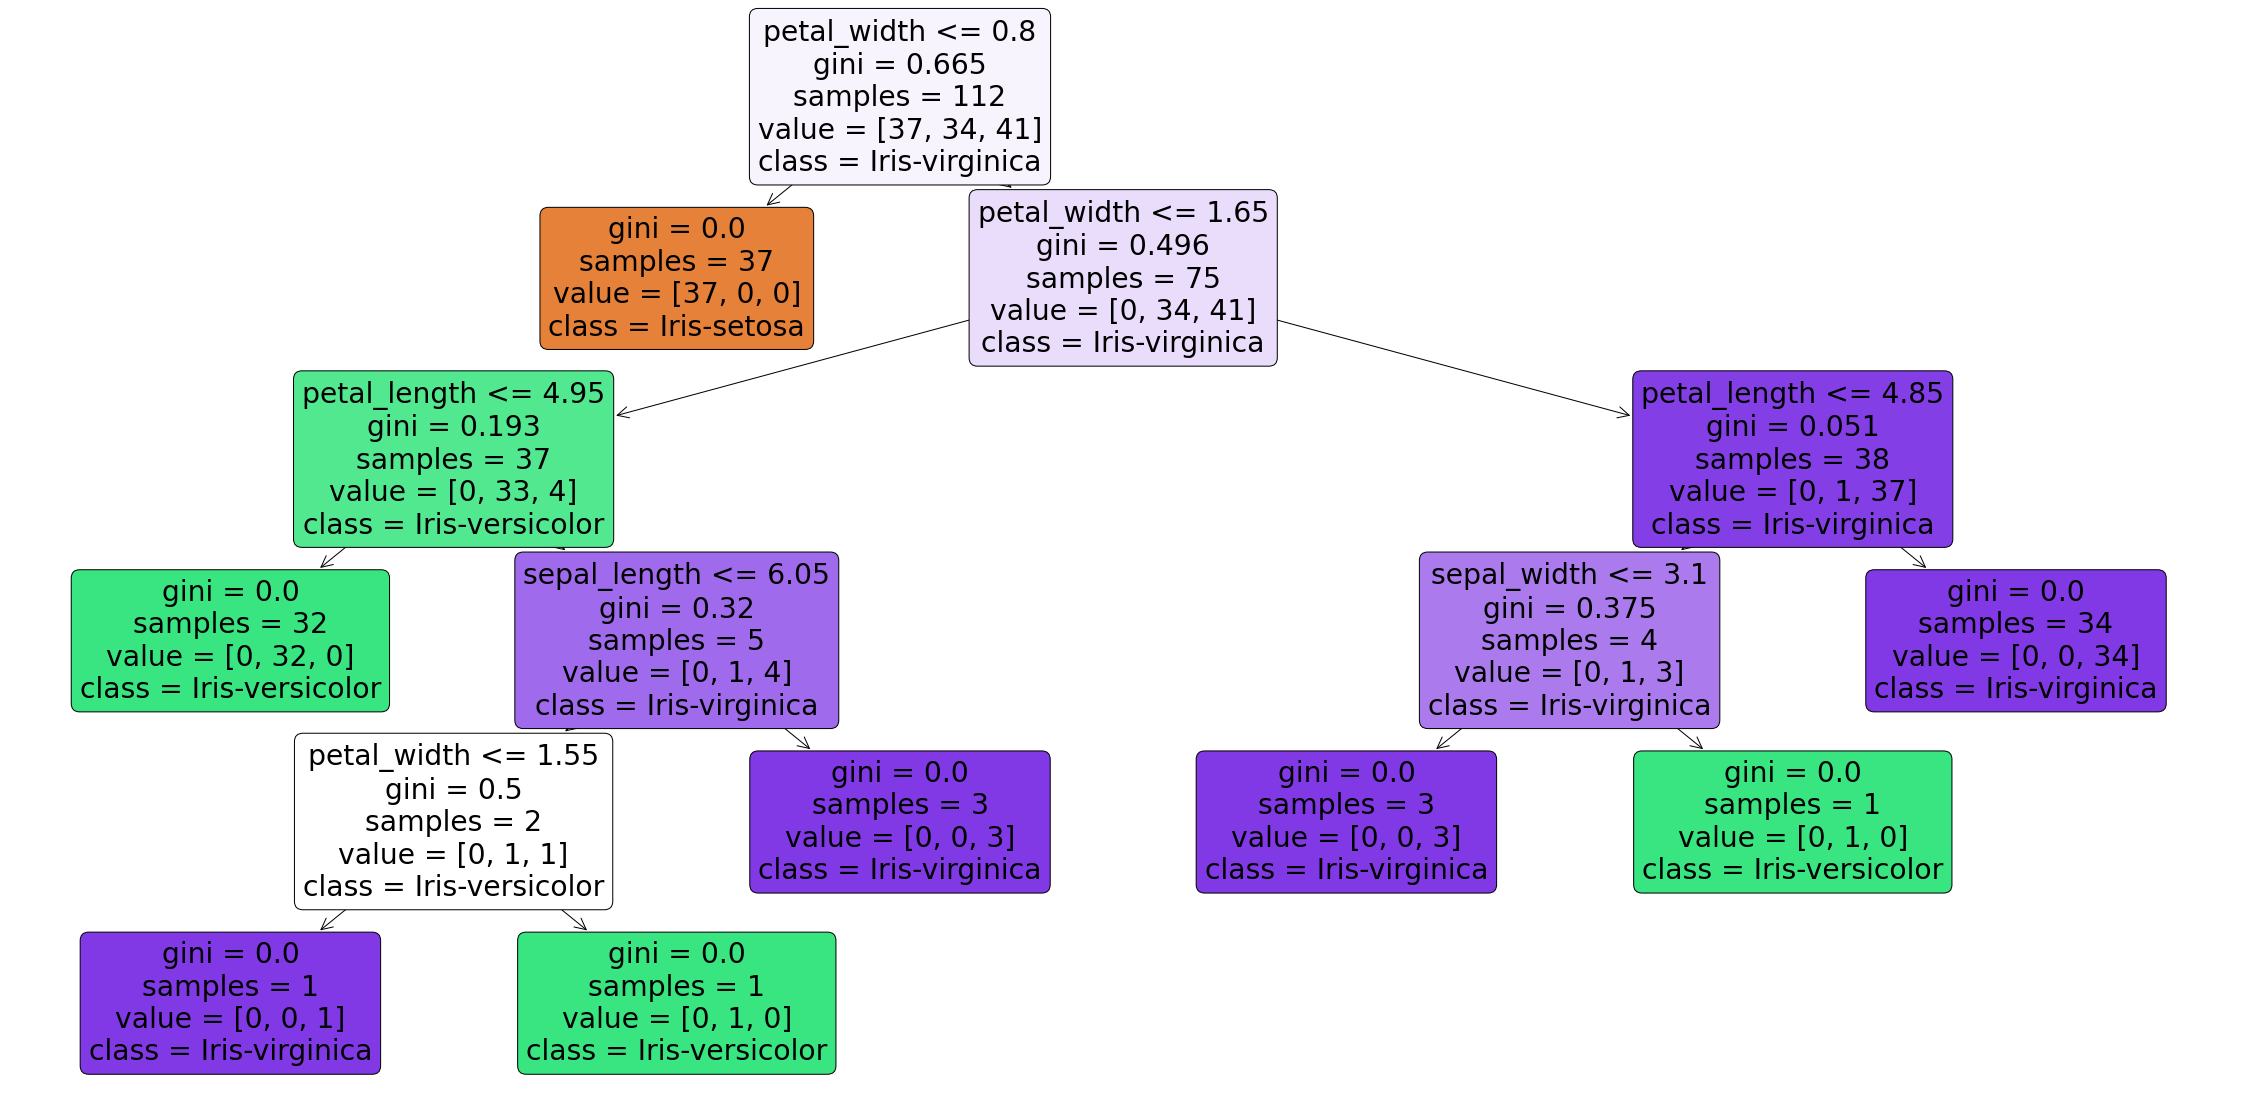

In [ ]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_model,
                  feature_names=feature_names,  
                  class_names=target,  
                  filled=True, rounded=True,) 
plt.show()

##### Visualização detalhada:

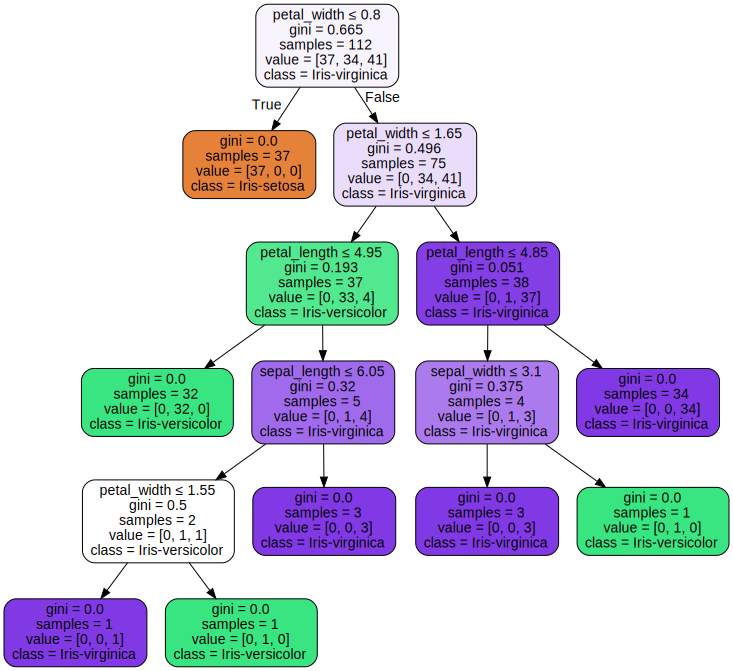

In [ ]:
dot_data = tree.export_graphviz(tree_model,
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

#### Avaliação da árvore

##### Acurácia, precisão, recall, f1-score

Avaliação de performance no conjunto de teste:

In [ ]:
predicted = tree_model.predict(x_test)
accuracy_score(y_test, predicted)

0.9736842105263158

In [ ]:
report = classification_report(y_test, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



Avaliação de performance no conjunto de treino:

In [ ]:
predicted_train = tree_model.predict(x_train)
accuracy_score(y_train, predicted_train)

1.0

In [ ]:
report = classification_report(y_train, predicted_train)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      1.00      1.00        34
 Iris-virginica       1.00      1.00      1.00        41

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



##### Matriz de confusão

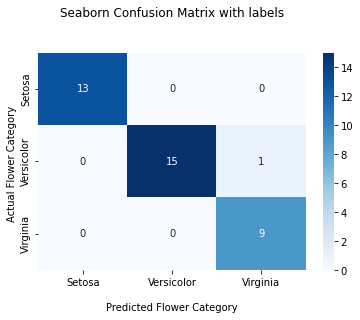

In [ ]:
cm = confusion_matrix(y_test, predicted)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
tree_model.get_depth()

5

### Variando o parâmetro `max_depth`

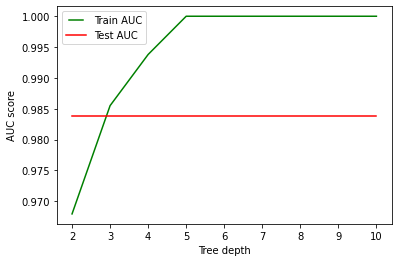

In [ ]:
max_depths = np.linspace(2, 10, 9, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   # treino
   train_pred = dt.predict(x_train)
   y_train_dummies = pd.get_dummies(y_train, drop_first=False).values
   y_train_score_dummies = pd.get_dummies(train_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dummies[:, i], y_train_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous train results
   train_results.append(roc_auc)

   # teste
   test_pred = dt.predict(x_test)
   y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
   y_test_score_dummies = pd.get_dummies(test_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_dummies[:, i], y_test_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'g', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks(max_depths)
plt.show()

#### Conclusão
Percebe-se no gráfico que a partir da profundidade máxima igual a 5, a métrica para os dados de treino e teste estaciona, o que indica que não há perspectiva de ganho com o aumento do parâmetro além desse valor. Além disso, apesar da baixa variação da performance no eixo vertical, pode-se dizer que uma árvore de decisão com profundidade máxima mais próxima de 3 apresenta um cenário mais equilibrado entre os dados de treino e teste, com bons resultados e menor custo computacional. **Portanto, é possível assumir o valor de `max_depth` igual a `3` como um dos ideais para o classificador em questão até então**.

### Variando o parâmetro `min_samples_split`

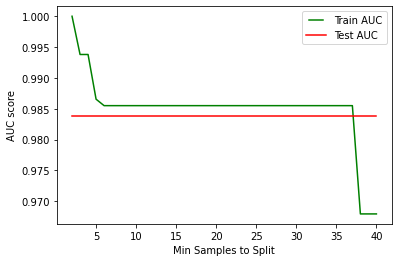

In [ ]:
min_samples_splits = [i for i in range(2,41)] #np.linspace(0.5, 1.0, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   # treino
   train_pred = dt.predict(x_train)
   y_train_dummies = pd.get_dummies(y_train, drop_first=False).values
   y_train_score_dummies = pd.get_dummies(train_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dummies[:, i], y_train_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous train results
   train_results.append(roc_auc)

   # teste
   test_pred = dt.predict(x_test)
   y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
   y_test_score_dummies = pd.get_dummies(test_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_dummies[:, i], y_test_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples to Split')
plt.show()

#### Conclusão
Apesar da baixa variação da performance no eixo vertical, pode-se dizer que uma árvore de decisão com min_samples_split entre aproximadamente 5 e 35 apresenta um cenário mais equilibrado entre os dados de treino e teste, assim como bons resultados com relação à métrica AUC. Como um valor mínimo mais alto contribui para obter um modelo menos específico para os dados de treino, **decidimos assumir o valor de `min_samples_split` igual a `35` como um dos ideais para o classificador em questão até então**.

### Variando o parâmetro `min_samples_leaf`

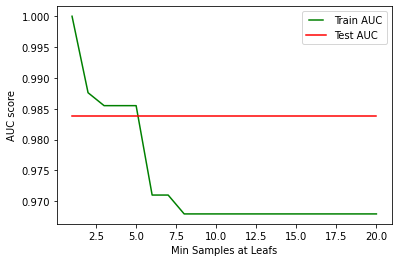

In [ ]:
min_samples_leafs = [i for i in range(1,21)] #np.linspace(0.01, 0.5, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=RANDOM_STATE)
   dt.fit(x_train, y_train)
   # treino
   train_pred = dt.predict(x_train)
   y_train_dummies = pd.get_dummies(y_train, drop_first=False).values
   y_train_score_dummies = pd.get_dummies(train_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_dummies[:, i], y_train_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous train results
   train_results.append(roc_auc)

   # teste
   test_pred = dt.predict(x_test)
   y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
   y_test_score_dummies = pd.get_dummies(test_pred, drop_first=False).values
   roc_auc = 0
   for i in range(3):
      false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_dummies[:, i], y_test_score_dummies[:, i])
      roc_auc += auc(false_positive_rate, true_positive_rate)
   roc_auc /= 3
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'g', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples at Leafs')
plt.show()

#### Conclusão
Percebe-se no gráfico que a partir da profundidade máxima igual a cerca de 7.5, a métrica para os dados de treino e teste estaciona num valor mais baixo, o que indica que não há perspectiva de ganho com o aumento do parâmetro além desse valor. Além disso, apesar da baixa variação da performance no eixo vertical, pode-se dizer que uma árvore de decisão com min_samples_leaf mais próxima de 5 apresenta um cenário mais equilibrado entre os dados de treino e teste e com bons resultados para ambos. **Portanto, é possível assumir o valor de `min_samples_leaf` igual a `5` como um dos ideais para o classificador em questão até então**.

### Árvore 2
Parâmetros:

*   **Maximum Depth:** `3`
  - Profundidade máxima da árvore. Se for igual a `None`, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split samples
*   **Minimum Samples to Split:** `35`
  - O número mínimo ou fração mínima de amostras necessário para dividir um nó interno
*   **Minimum Samples at Leafs:** `5`
  - O número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos min_samples_leaf amostras de treinamento em cada um dos ramos esquerdo e direito.



#### Definição e treinamento da árvore

In [ ]:
tree_model = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_STATE, splitter='best', max_depth=3, min_samples_split=35, min_samples_leaf=5)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=35,
                       random_state=1)

#### Visualização da árvore

In [ ]:
target = list(df['species'].apply(str).unique())
feature_names = list(x.columns)

##### Visualização panorâmica:

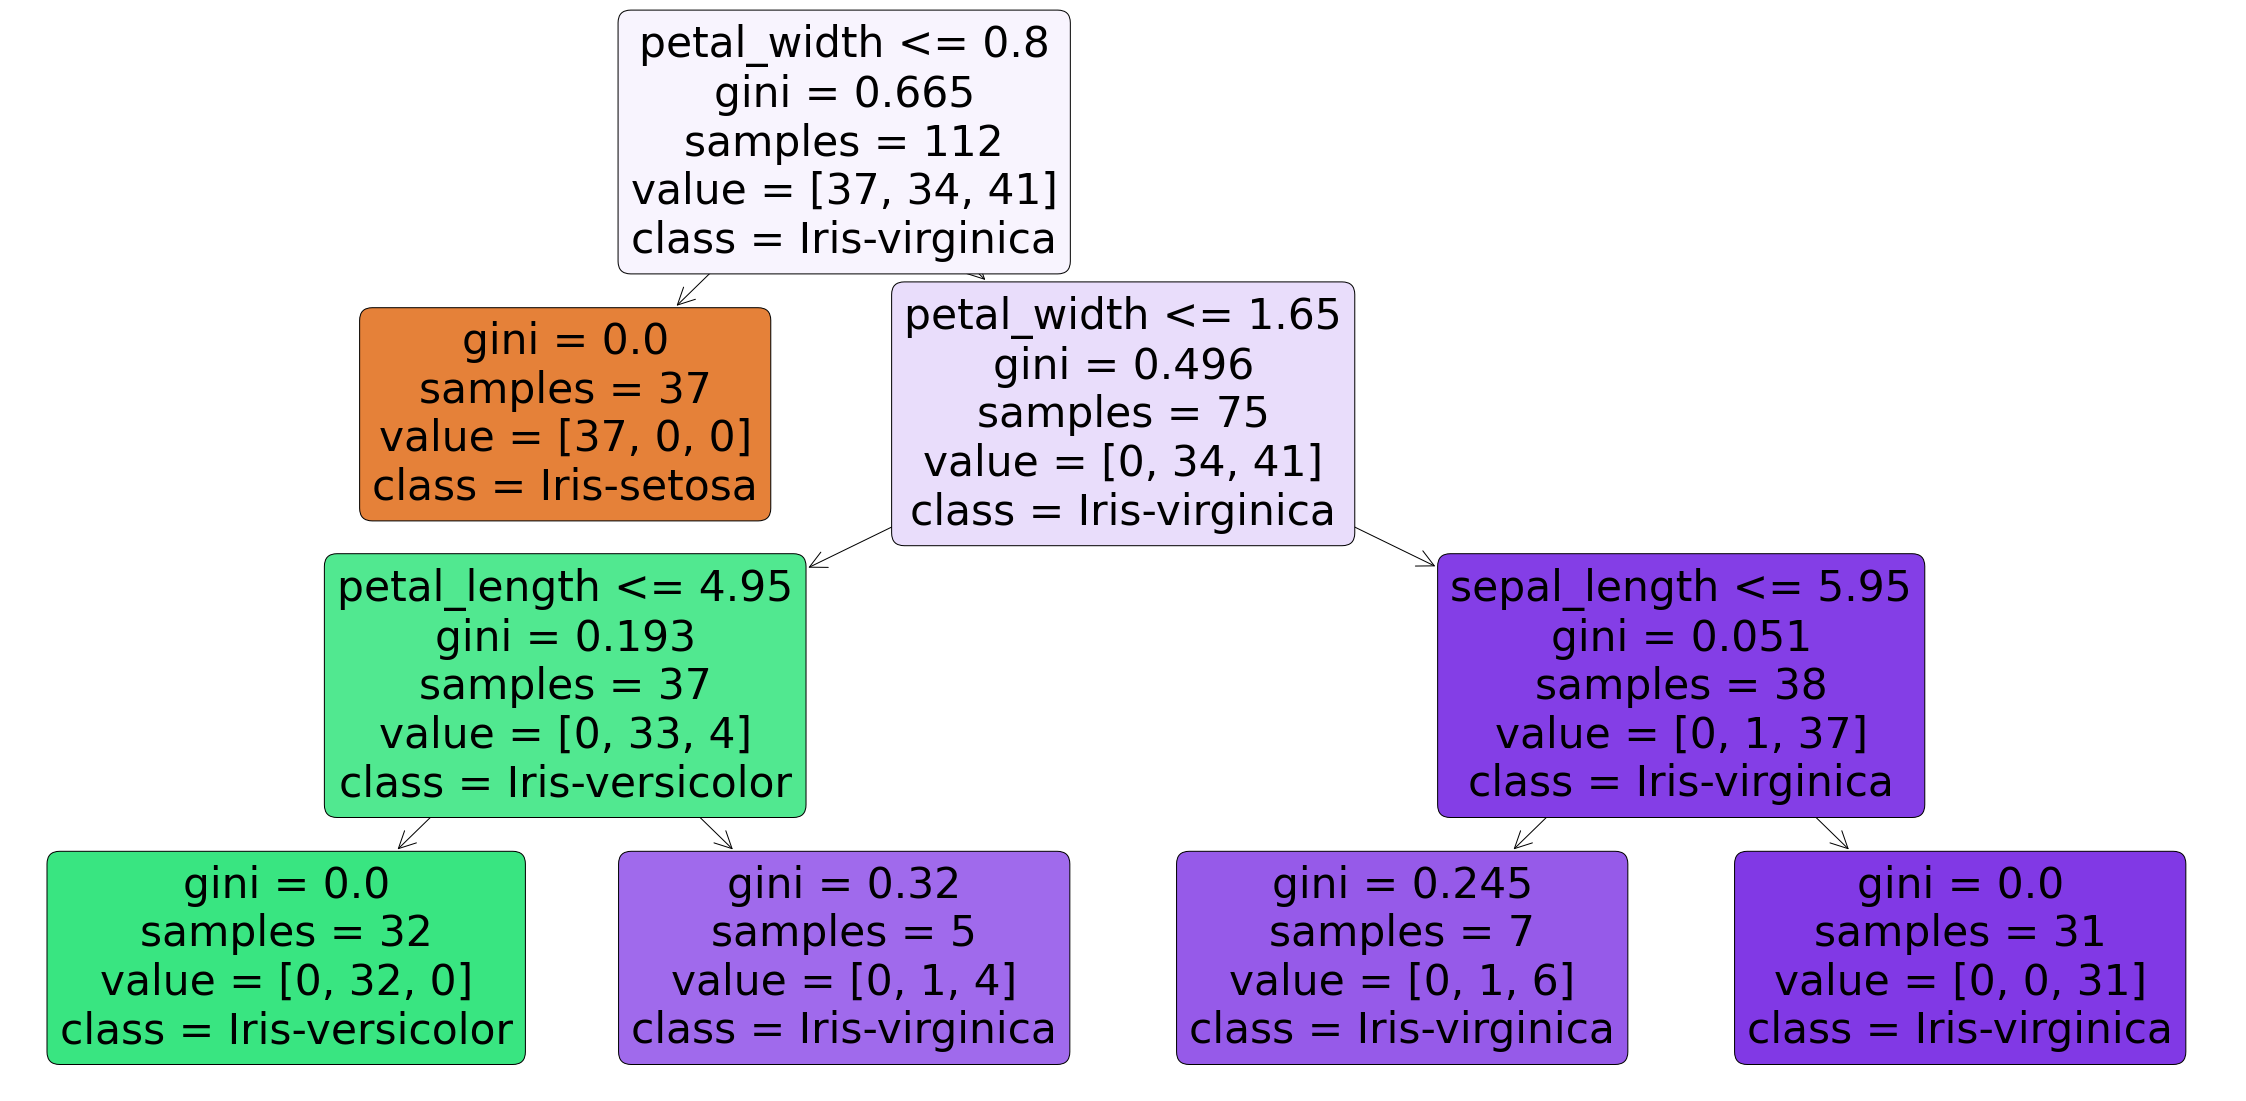

In [ ]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_model,
                  feature_names=feature_names,  
                  class_names=target,  
                  filled=True, rounded=True,) 
plt.show()

##### Visualização detalhada:

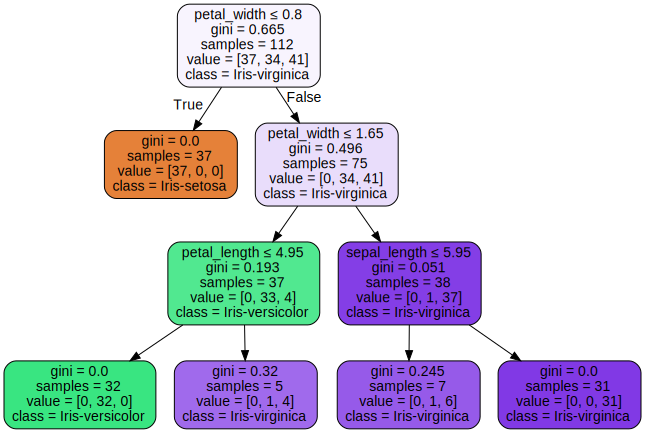

In [ ]:
dot_data = tree.export_graphviz(tree_model,
                                out_file=None, 
                                feature_names=feature_names,  
                                class_names=target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph

#### Avaliação da árvore

##### Acurácia, precisão, recall, f1-score

Avaliação de performance no conjunto de teste:

In [ ]:
predicted = tree_model.predict(x_test)
accuracy_score(y_test, predicted)

0.9736842105263158

In [ ]:
report = classification_report(y_test, predicted)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



Avaliação de performance no conjunto de treino:

In [ ]:
predicted_train = tree_model.predict(x_train)
accuracy_score(y_train, predicted_train)

0.9821428571428571

In [ ]:
report = classification_report(y_train, predicted_train)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       1.00      0.94      0.97        34
 Iris-virginica       0.95      1.00      0.98        41

       accuracy                           0.98       112
      macro avg       0.98      0.98      0.98       112
   weighted avg       0.98      0.98      0.98       112



##### Matriz de confusão

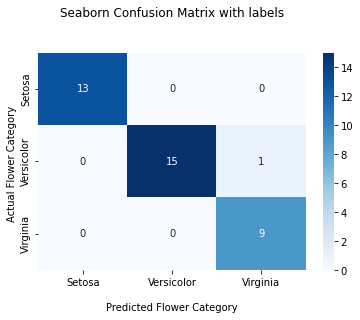

In [ ]:
cm = confusion_matrix(y_test, predicted)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Resumo

Com as experimentações apresentadas, as tendências de ganho percebidas com a variação de parâmetros da árvore foram:

*   Valores menores de `max_depth` (com relação ao valor máximo atingido sem limitação de profundidade)
  - Ajudam a reduzir complexidade do modelo
  - Diminuem a especificidade das condições (chance de overfitting)
*   Valores baixos / medianos de `min_samples_split` (com relação ao tamanho da base)
  - Ajudam a evitar condições muito específicas sobre os dados de treino (overfitting)
  - Se forem muito baixos podem levar ao underfitting
*   Valores medianos de `min_samples_leaf` (com relação ao tamanho da base)
  - Valores muito baixos levam ao overfitting

| Parâmetros variados | Valores considerados |
|--- |--- |
| Profundidade máxima | [ 2, 3, ... 10 ] |
| Mínimo de amostras para split | [ 2, 3, ... 40 ] |
| Mínimo de amostras nas folhas | [ 1, 2, ... 20 ] |

---

| | Modelo inicial | Modelo final |
|--- |--- |--- |
| Profundidade máxima -> Profundidade | inf -> 5 | 3 -> 3 |
| Mínimo de amostras para split | 2 | 35 |
| Mínimo de amostras nas folhas | 1 | 5 |
| Acurácia teste | 97% | 97% |
| Acurácia treino | 100% | 98% |

